In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df=pd.read_csv('tough_dataset.csv',encoding='latin1')

In [5]:
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar
1,68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetai

In [6]:
df.dtypes

id                             int64
Target A                     float64
Target B                       int64
LOAN_AMT                       int64
Business Title                object
Civil Service Title           object
Division/Work Unit            object
Job Description               object
Minimum Qual Requirements     object
Preferred Skills              object
Additional Information        object
To Apply                      object
Hours/Shift                   object
Residency Requirement         object
Posting Date                  object
Posting Updated               object
Process Date                  object
FormalEducation               object
UndergradMajor                object
CompanySize                   object
DevType                       object
YearsCoding                   object
YearsCodingProf               object
HopeFiveYears                 object
JobSearchStatus               object
LastNewJob                    object
UpdateCV                      object
C

In [7]:
obj=[x for x in df.columns if df[x].dtype=='object']

In [8]:
num=[x for x in df.columns if df[x].dtype!='object']

In [9]:
obj

['Business Title',
 'Civil Service Title',
 'Division/Work Unit',
 'Job Description',
 'Minimum Qual Requirements',
 'Preferred Skills',
 'Additional Information',
 'To Apply',
 'Hours/Shift',
 'Residency Requirement',
 'Posting Date',
 'Posting Updated',
 'Process Date',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'UpdateCV',
 'CommunicationTools',
 'TimeFullyProductive',
 'EducationTypes',
 'SelfTaughtTypes',
 'TimeAfterBootcamp',
 'HackathonReasons',
 'AgreeDisagree1',
 'AgreeDisagree2',
 'AgreeDisagree3',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'FrameworkWorkedWith',
 'FrameworkDesireNextYear',
 'IDE',
 'OperatingSystem',
 'Methodology',
 'VersionControl',
 'CheckInCode',
 'AIDangerous',
 'AIInteresting',
 'AIResponsible',
 'AIFuture',
 'Age',
 'term',
 'emp_len

In [10]:
num

['id', 'Target A', 'Target B', 'LOAN_AMT', 'dti', 'last_pymnt_amnt']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2946 non-null   int64  
 1   Target A                   2946 non-null   float64
 2   Target B                   2946 non-null   int64  
 3   LOAN_AMT                   2946 non-null   int64  
 4   Business Title             2946 non-null   object 
 5   Civil Service Title        2946 non-null   object 
 6   Division/Work Unit         2946 non-null   object 
 7   Job Description            2946 non-null   object 
 8   Minimum Qual Requirements  2926 non-null   object 
 9   Preferred Skills           2553 non-null   object 
 10  Additional Information     1854 non-null   object 
 11  To Apply                   2945 non-null   object 
 12  Hours/Shift                884 non-null    object 
 13  Residency Requirement      2942 non-null   objec

In [12]:
df['Target B'].value_counts()

0    2327
1     619
Name: Target B, dtype: int64

In [13]:
df['Business Title'].nunique()

1244

In [14]:
df['Civil Service Title'].nunique()

312

In [15]:
df['Division/Work Unit'].nunique()

678

In [17]:
df.groupby(df['Division/Work Unit'])['Target B'].value_counts()

Division/Work Unit              Target B
10th Precinct - Civilian/Cadet  0           1
24th Precinct Civilian/Cadet    0           2
311 Operations                  0           4
A/C Prop Exemp Adm              0           1
ACCO Office                     0           6
                                           ..
Workforce Training              0           2
World Trde Centr Hlth Registry  0           4
Wtr Sup/179 St Pump Sta Sys     0           2
Zoning                          0           1
                                1           1
Name: Target B, Length: 976, dtype: int64

In [18]:
df['Business Title'].value_counts().head(10)

Assistant Civil Engineer        33
Project Manager                 29
College Aide                    24
Construction Project Manager    22
ACCOUNTABLE MANAGER             20
Confidential Investigator       18
Investigator                    17
Watershed Maintainer            17
Prosecuting Attorney            16
Senior Project Manager          15
Name: Business Title, dtype: int64

In [19]:
df['Division/Work Unit'].value_counts().head(50)

Executive Management              56
Central Brookly City Operation    36
Law Department                    32
Administration                    31
Citywide Cybersecurity            29
Default                           28
Green Infrastructure              25
W   S/Connections Permitting      25
Information Technology            24
Dept of Environment Protection    24
Prosecution Division              22
Office of Energy Conservatio      20
Asset Management                  20
Human Resources                   20
Blue Belt Unit                    19
OCME-Admin                        19
Pub Bldgs/Corrections             18
Lead Hazard Control Department    18
Environmental Health & Safety     18
Executive Deputy Com              18
Civilian Complaint Review Bd      17
Sidewalk/inspection Management    17
Mis Admin,Network Sysms Dvlpmt    17
WSO-OGI Maintenance               17
Infra-Coastal Resiliency          16
Executive                         16
Borough President - Queens        16
I

In [20]:
df['Civil Service Title'].value_counts().head(100)

COMMUNITY COORDINATOR             182
AGENCY ATTORNEY                   112
CIVIL ENGINEER                     87
CITY RESEARCH SCIENTIST            83
CLERICAL ASSOCIATE                 72
CONSTRUCTION PROJECT MANAGER       72
COMMUNITY ASSOCIATE                69
ADMINISTRATIVE PROJECT MANAGER     58
COMPUTER SYSTEMS MANAGER           57
PRINCIPAL ADMINISTRATIVE ASSOC     53
ADMINISTRATIVE STAFF ANALYST (     53
BUDGET ANALYST (OMB)               52
COLLEGE AIDE (ALL CITY DEPTS)      52
ADMINISTRATIVE ENGINEER            50
ADMINISTRATIVE BUSINESS PROMOT     48
ASSISTANT CIVIL ENGINEER           45
ASSOCIATE PROJECT MANAGER          44
CONFIDENTIAL INVESTIGATOR          41
EXECUTIVE AGENCY COUNSEL           41
COMPUTER SPECIALIST (SOFTWARE)     39
STAFF ANALYST                      37
ASSOCIATE STAFF ANALYST            35
ADMINISTRATIVE CONSTRUCTION PR     34
ASSISTANT CORPORATION COUNSEL      33
PROJECT MANAGER                    33
PROCUREMENT ANALYST                32
AGENCY ATTOR

In [21]:
df1=df.copy()

In [22]:
df1['freq_bus']=df1['Business Title'].map(df1['Business Title'].value_counts())
df1['freq_civil']=df1['Civil Service Title'].map(df1['Civil Service Title'].value_counts())
df1['freq_div']=df1['Division/Work Unit'].map(df1['Division/Work Unit'].value_counts())

In [23]:
df1.drop(['Business Title','Civil Service Title','Division/Work Unit'],inplace=True,axis=1)

In [25]:
df1['Minimum Qual Requirements'].fillna('noinformation',inplace=True)

In [26]:
df1['freq_qual']=df1['Minimum Qual Requirements'].map(df1['Minimum Qual Requirements'].value_counts())

In [27]:
df1.drop('Minimum Qual Requirements',inplace=True,axis=1)

In [28]:
df1.drop('To Apply',inplace=True,axis=1)

In [30]:
df1['Residency Requirement'].nunique()

50

In [31]:
df1['Residency Requirement'].isnull().sum()

4

In [32]:
df1['Residency Requirement'].fillna('not required',inplace=True)

In [33]:
df1['Residency Requirement'].isnull().sum()

0

In [34]:
df1['res_req'] = df1['Residency Requirement'].str.contains("not required|no residency requirement|is exempt", case=False)

In [35]:
df1['res_req'].value_counts()

False    1774
True     1172
Name: res_req, dtype: int64

In [36]:
df1['resreq']=np.where(df1['res_req']==False,1,0)

In [37]:
df1['resreq'].value_counts()

1    1774
0    1172
Name: resreq, dtype: int64

In [38]:
df1.drop(['res_req','Residency Requirement'],axis=1,inplace=True)

In [39]:
df1['Hours/Shift'].isnull().mean()

0.6999321113374066

In [40]:
df1['shift'] = df1['Hours/Shift'].str.contains("35",case=False)

In [41]:
df1['shift'].value_counts()

True     522
False    362
Name: shift, dtype: int64

In [42]:
df1['40hrs']=df1['Hours/Shift'].str.contains("40|8am - 4pm|9am to 5pm|9a.m. to 5p.m.|0900 to 1700 hours.|9 A.M. â€“ 5 P.M|9 AM - 5 PM|9:00 a.m. to 5:00 p.m.|8:30am to 4:30pm", case=False)

In [43]:
df1['40hrs'].value_counts()

False    797
True      87
Name: 40hrs, dtype: int64

In [44]:
df1['40hrshift']=np.where(df1['40hrs']==True,1,0)
df1['35hrshift']=np.where(df1['shift']==True,1,0)

In [45]:
df1['35hrshift'].value_counts()

0    2424
1     522
Name: 35hrshift, dtype: int64

In [46]:
df1.drop(['40hrs','shift','Hours/Shift'],axis=1,inplace=True)

In [47]:
df1['Posting Date'] = df1['Posting Date'].str.replace('T00:00:00.000', '')
df1['Posting Updated'] = df1['Posting Updated'].str.replace('T00:00:00.000', '')
df1['Process Date'] = df1['Process Date'].str.replace('T00:00:00.000', '')

In [48]:
df1['Posting Date'] =pd.to_datetime(df1['Posting Date'])
df1['Posting Updated'] =pd.to_datetime(df1['Posting Updated'])
df1['Process Date'] =pd.to_datetime(df1['Process Date'])

In [49]:
df1['Process Date'].isnull().sum()

4

In [50]:
df1['Posting Updated'].isnull().sum()

4

In [51]:
df1['timedif']=df1['Process Date']-df1['Posting Updated']

In [52]:
df1['timedif']=df1['timedif'].dt.days

In [53]:
df1.drop(['Posting Date','Posting Updated','Process Date'],axis=1,inplace=True)

In [54]:
df1['FormalEducation'].unique()

array(['Bachelor\x92s degree (BA, BS, B.Eng., etc.)', 'Associate degree',
       'Some college/university study without earning a degree',
       'Master\x92s degree (MA, MS, M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       nan, 'Primary/elementary school',
       'Professional degree (JD, MD, etc.)',
       'I never completed any formal education',
       'Other doctoral degree (Ph.D, Ed.D., etc.)'], dtype=object)

In [55]:
df1['FormalEducation'].value_counts()

Bachelors degree (BA, BS, B.Eng., etc.)                                              1442
Masters degree (MA, MS, M.Eng., MBA, etc.)                                            716
Some college/university study without earning a degree                                 319
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     179
Associate degree                                                                        92
Other doctoral degree (Ph.D, Ed.D., etc.)                                               75
Professional degree (JD, MD, etc.)                                                      43
Primary/elementary school                                                               17
I never completed any formal education                                                  11
Name: FormalEducation, dtype: int64

In [56]:
df1['FormalEducation'].isnull().sum()

52

In [57]:
df1['FormalEducation'].fillna('Bachelors degree (BA, BS, B.Eng., etc.)',inplace=True)

In [58]:
di={"Bachelor\x92s degree (BA, BS, B.Eng., etc.)":6,'Associate degree':5,'Some college/university study without earning a degree':4,
   'Master\x92s degree (MA, MS, M.Eng., MBA, etc.)':7,'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':3,
   'Primary/elementary school':2,
   'Professional degree (JD, MD, etc.)':9,
   'I never completed any formal education':1,
   'Other doctoral degree (Ph.D, Ed.D., etc.)':8}

In [59]:
df1['FormalEducation']=df1['FormalEducation'].map(di)

In [60]:
df1['FormalEducation'].value_counts()

6    1494
7     716
4     319
3     179
5      92
8      75
9      43
2      17
1      11
Name: FormalEducation, dtype: int64

In [61]:
df1['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          1698
Information systems, information technology, or system administration     247
Another engineering discipline (ex. civil, electrical, mechanical)        205
A natural science (ex. biology, chemistry, physics)                       109
Mathematics or statistics                                                  86
A business discipline (ex. accounting, finance, marketing)                 65
Web development or web design                                              64
A humanities discipline (ex. literature, history, philosophy)              48
Fine arts or performing arts (ex. graphic design, music, studio art)       38
A social science (ex. anthropology, psychology, political science)         38
I never declared a major                                                   23
A health science (ex. nursing, pharmacy, radiology)                         3
Name: UndergradMajor, dtype: int64

In [62]:
df1['UndergradMajor'].isnull().sum()

322

In [63]:
df1['UndergradMajor'].fillna('other',inplace=True)

In [64]:
df1.groupby(['Target B'])['UndergradMajor'].value_counts()

Target B  UndergradMajor                                                       
0         Computer science, computer engineering, or software engineering          1343
          other                                                                     261
          Information systems, information technology, or system administration     200
          Another engineering discipline (ex. civil, electrical, mechanical)        147
          A natural science (ex. biology, chemistry, physics)                        87
          Mathematics or statistics                                                  70
          A business discipline (ex. accounting, finance, marketing)                 53
          Web development or web design                                              53
          A humanities discipline (ex. literature, history, philosophy)              38
          Fine arts or performing arts (ex. graphic design, music, studio art)       35
          A social science (ex. anthropo

<AxesSubplot:xlabel='UndergradMajor'>

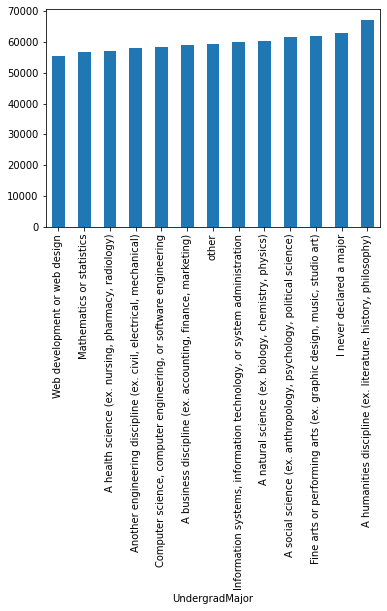

In [65]:
df1.groupby(['UndergradMajor'])['Target A'].mean().sort_values().plot(kind='bar')

In [66]:
dum=pd.get_dummies(df1['UndergradMajor'],drop_first=True)
df1=df1.join(dum)

In [67]:
df1.drop('UndergradMajor',axis=1,inplace=True)

In [68]:
df1['CompanySize'].value_counts()

20 to 99 employees          719
100 to 499 employees        580
10,000 or more employees    387
10 to 19 employees          329
1,000 to 4,999 employees    316
Fewer than 10 employees     304
500 to 999 employees        205
5,000 to 9,999 employees    106
Name: CompanySize, dtype: int64

In [69]:
df1['CompanySize'].isnull().sum()

0

In [70]:
df1['CompanySize']=df1['CompanySize'].map({'20 to 99 employees':3,
'100 to 499 employees'    :    4,
'10,000 or more employees' :   8,
'10 to 19 employees'        :  2,
'1,000 to 4,999 employees'   : 6,
'Fewer than 10 employees'    : 1,
'500 to 999 employees'     :  5,
'5,000 to 9,999 employees'  :  7})

<AxesSubplot:xlabel='YearsCodingProf'>

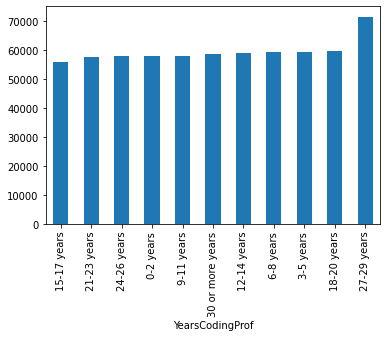

In [71]:
df1.groupby(['YearsCodingProf'])['Target A'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='YearsCoding'>

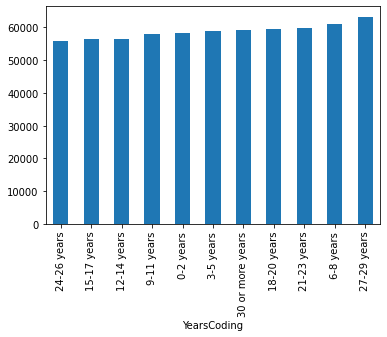

In [72]:
df1.groupby(['YearsCoding'])['Target A'].mean().sort_values().plot(kind='bar')

In [73]:
df1.groupby(['Target B'])['YearsCoding'].value_counts()

Target B  YearsCoding     
0         3-5 years           557
          6-8 years           485
          9-11 years          351
          12-14 years         214
          0-2 years           206
          15-17 years         167
          18-20 years         141
          30 or more years     73
          21-23 years          63
          24-26 years          43
          27-29 years          26
1         6-8 years           145
          3-5 years           142
          9-11 years           92
          12-14 years          63
          0-2 years            42
          15-17 years          38
          18-20 years          38
          30 or more years     20
          21-23 years          19
          24-26 years          11
          27-29 years           7
Name: YearsCoding, dtype: int64

In [74]:
df1.groupby(['Target B'])['YearsCodingProf'].value_counts()

Target B  YearsCodingProf 
0         3-5 years           607
          0-2 years           518
          6-8 years           322
          9-11 years          201
          12-14 years         108
          15-17 years          84
          18-20 years          66
          21-23 years          35
          30 or more years     28
          24-26 years          18
          27-29 years           8
1         3-5 years           184
          0-2 years           135
          6-8 years            79
          9-11 years           48
          12-14 years          31
          18-20 years          23
          15-17 years          19
          30 or more years     10
          21-23 years           7
          24-26 years           5
          27-29 years           2
Name: YearsCodingProf, dtype: int64

In [75]:
df1['YearsCodingProf'].isnull().sum()

408

In [76]:
df1['YearsCoding'].isnull().sum()

3

In [77]:
df1['YearsCoding'].fillna('3-5 years',inplace=True)

In [78]:
df1['YearsCodingProf'].value_counts()

3-5 years           791
0-2 years           653
6-8 years           401
9-11 years          249
12-14 years         139
15-17 years         103
18-20 years          89
21-23 years          42
30 or more years     38
24-26 years          23
27-29 years          10
Name: YearsCodingProf, dtype: int64

In [79]:
df1['YearsCodingProf'].fillna('nan',inplace=True)

In [80]:
df1['noprof']=np.where(df1['YearsCodingProf']=='nan',1,0)

In [81]:
df1['same']=np.where(df1['YearsCodingProf']==df1['YearsCoding'],1,0)

In [82]:
df1['same'].value_counts()

0    2062
1     884
Name: same, dtype: int64

In [83]:
df1['YearsCoding'].unique()

array(['3-5 years', '30 or more years', '24-26 years', '18-20 years',
       '6-8 years', '9-11 years', '0-2 years', '15-17 years',
       '12-14 years', '21-23 years', '27-29 years'], dtype=object)

In [84]:
df1['YearsCoding']=df1['YearsCoding'].map({'3-5 years':2, '30 or more years':11, '24-26 years':9, '18-20 years':7,
       '6-8 years':3, '9-11 years':4, '0-2 years':1, '15-17 years':6,
       '12-14 years':5, '21-23 years':8, '27-29 years':10})

In [85]:
df1.drop('YearsCodingProf',axis=1,inplace=True)

In [86]:
df1['HopeFiveYears'].isnull().sum()

469

In [87]:
df1['HopeFiveYears'].value_counts()

Working in a different or more specialized technical role than the one I'm in now    872
Working as a founder or co-founder of my own company                                 599
Doing the same work                                                                  496
Working as an engineering manager or other functional manager                        251
Working as a product manager or project manager                                      164
Working in a career completely unrelated to software development                      60
Retirement                                                                            35
Name: HopeFiveYears, dtype: int64

In [88]:
df1['HopeFiveYears'].fillna('hother',inplace=True)

In [89]:
df1.groupby(['Target B'])['HopeFiveYears'].value_counts()

Target B  HopeFiveYears                                                                    
0         Working in a different or more specialized technical role than the one I'm in now    697
          Working as a founder or co-founder of my own company                                 465
          Doing the same work                                                                  387
          hother                                                                               377
          Working as an engineering manager or other functional manager                        187
          Working as a product manager or project manager                                      133
          Working in a career completely unrelated to software development                      52
          Retirement                                                                            29
1         Working in a different or more specialized technical role than the one I'm in now    175
          Working

<AxesSubplot:xlabel='HopeFiveYears'>

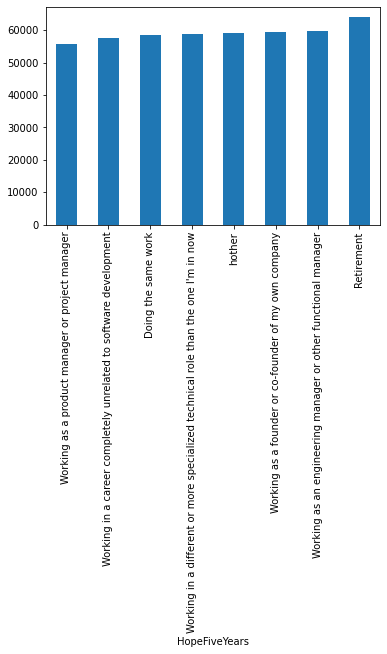

In [90]:
df1.groupby(['HopeFiveYears'])['Target A'].mean().sort_values().plot(kind='bar')

In [91]:
dumm=pd.get_dummies(df1['HopeFiveYears'],drop_first=True)
df1=df1.join(dumm)

In [92]:
df1.drop('HopeFiveYears',inplace=True,axis=1)

In [93]:
df1['JobSearchStatus'].value_counts()

Im not actively looking, but I am open to new opportunities    1542
I am not interested in new job opportunities                     645
I am actively looking for a job                                  324
Name: JobSearchStatus, dtype: int64

In [94]:
df1['JobSearchStatus'].isnull().sum()

435

In [95]:
df1['JobSearchStatus'].fillna('nan',inplace=True)

In [96]:
df1.groupby(['Target B'])['JobSearchStatus'].value_counts()

Target B  JobSearchStatus                                             
0         Im not actively looking, but I am open to new opportunities    1214
          I am not interested in new job opportunities                     508
          nan                                                              348
          I am actively looking for a job                                  257
1         Im not actively looking, but I am open to new opportunities     328
          I am not interested in new job opportunities                     137
          nan                                                               87
          I am actively looking for a job                                   67
Name: JobSearchStatus, dtype: int64

<AxesSubplot:xlabel='JobSearchStatus'>

F:\anCONDA\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anCONDA\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


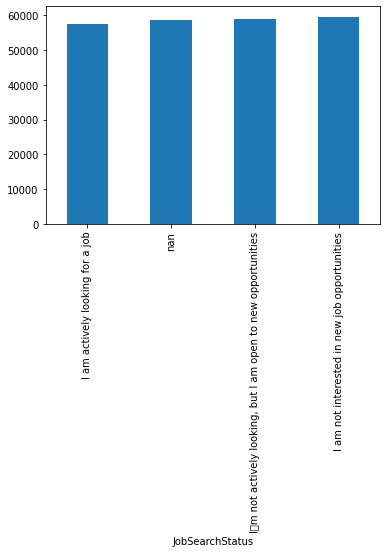

In [97]:
df1.groupby(['JobSearchStatus'])['Target A'].mean().sort_values().plot(kind='bar')

In [98]:
dummj=pd.get_dummies(df1['JobSearchStatus'],drop_first=True)
df1=df1.join(dummj)

In [99]:
df1.drop('JobSearchStatus',axis=1,inplace=True)

In [100]:
df1['LastNewJob'].value_counts()

Less than a year ago         895
Between 1 and 2 years ago    585
Between 2 and 4 years ago    528
More than 4 years ago        488
I've never had a job           3
Name: LastNewJob, dtype: int64

In [101]:
df1['LastNewJob'].isnull().sum()

447

In [102]:
df1['LastNewJob'].fillna('new',inplace=True)

In [103]:
df1['LastNewJob'].unique()

array(['Less than a year ago', 'More than 4 years ago',
       'Between 1 and 2 years ago', 'Between 2 and 4 years ago', 'new',
       "I've never had a job"], dtype=object)

In [104]:
df1['LastNewJob']=df1['LastNewJob'].map({'Less than a year ago':6, 'More than 4 years ago':3,
       'Between 1 and 2 years ago':5, 'Between 2 and 4 years ago':4, 'new':2,
       "I've never had a job":1})

In [105]:
df1['UpdateCV'].isnull().mean()

0.2909029192124915

In [106]:
df1['UpdateCV'].value_counts()

My job status or other personal status changed                      825
A recruiter contacted me                                            300
I had a negative experience or interaction at work                  283
A friend told me about a job opportunity                            225
I saw an employers advertisement                                   191
I did not receive an expected change in compensation                149
I received bad news about the future of my company or department    109
I received negative feedback on my job performance                    7
Name: UpdateCV, dtype: int64

In [107]:
df1['CommunicationTools'].isnull().mean()

0.313306177868296

In [108]:
df1['CommunicationTools'].fillna('hdwi',inplace=True)

In [109]:
df1['confluence']=(df1['CommunicationTools'].str.contains("Confluence", case=False)).map({True:1,False:0})

In [110]:
lis=['Slack','Other wiki tool (Github, Google Sites, proprietary software, etc.)','Other chat system (IRC, proprietary software, etc.)','Office / productivity suite (Microsoft Office, Google Suite, etc.)','Google Hangouts/Chat','Facebook','Trello','Jira','HipChat','Stack Overflow Enterprise']

In [111]:
for fea in lis:
    df1[fea]=(df1['CommunicationTools'].str.contains(fea, case=False)).map({True:1,False:0}) 

F:\anCONDA\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [112]:
df1['Slack'].value_counts()

0    1898
1    1048
Name: Slack, dtype: int64

In [113]:
df1['Jira'].value_counts()

0    2067
1     879
Name: Jira, dtype: int64

In [114]:
df1.drop('CommunicationTools',inplace=True,axis=1)

In [115]:
df1['TimeFullyProductive'].value_counts()

One to three months      909
Less than a month        643
Three to six months      347
Six to nine months       111
Nine months to a year     25
More than a year          17
Name: TimeFullyProductive, dtype: int64

In [116]:
df1['TimeFullyProductive'].isnull().mean()

0.3034623217922607

<AxesSubplot:xlabel='TimeFullyProductive'>

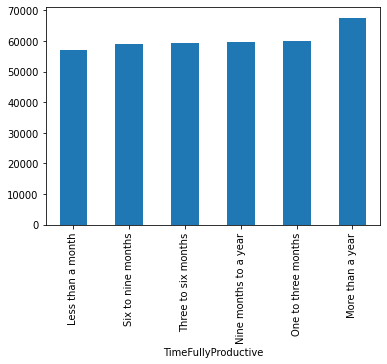

In [117]:
df1.groupby(['TimeFullyProductive'])['Target A'].mean().sort_values().plot(kind='bar')

In [118]:
df1['TimeFullyProductive'].fillna('else',inplace=True)

<AxesSubplot:xlabel='TimeFullyProductive'>

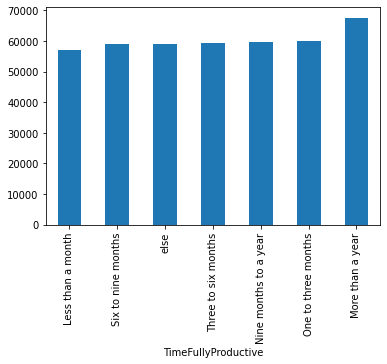

In [119]:
df1.groupby(['TimeFullyProductive'])['Target A'].mean().sort_values().plot(kind='bar')

In [120]:
df1['TimeFullyProductive'].unique()

array(['One to three months', 'else', 'Three to six months',
       'Less than a month', 'Six to nine months', 'More than a year',
       'Nine months to a year'], dtype=object)

In [121]:
df1['TimeFullyProductive']=df1['TimeFullyProductive'].map({'One to three months':2, 'else':0, 'Three to six months':3,
       'Less than a month':1, 'Six to nine months':4, 'More than a year':6,
       'Nine months to a year':5})

In [122]:
df1['misspro']=np.where(df1['TimeFullyProductive']==0,1,0)

In [123]:
df1['EducationTypes'].isnull().sum()

818

In [124]:
df1['edutype']=(df['EducationTypes'].str.count(';'))+1

In [125]:
df1['edutype'].fillna(0,inplace=True)

In [126]:
df1.drop('EducationTypes',axis=1,inplace=True)

In [127]:
df1['SelfTaughtTypes'].isnull().mean()

0.384928716904277

In [128]:
df1['SelfTaughtTypes'].fillna('Nothing',inplace=True)

In [129]:
df1['SelfTaughtTypes'].str.get_dummies(sep=';').rename(lambda x: 'col_' + x, axis='columns')

,"col_A book or e-book from OReilly, Apress, or a similar publisher",col_A college/university computer science or software engineering book,"col_Internal Wikis, chat rooms, or documentation set up by my company for employees",col_Nothing,"col_Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",col_Pre-scheduled tutoring or mentoring sessions with a friend or colleague,col_Questions & answers on Stack Overflow,"col_Tapping your network of friends, family, and peers versed in the technology",col_The official documentation and/or standards for the technology,col_The technologys online help system
0,1,0,0,0,1,0,1,0,1,0
1,0,0,0,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,1,1
4,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2941,1,0,0,0,1,0,1,0,1,0
2942,0,0,0,0,0,0,0,0,1,1
2943,0,0,0,0,0,0,1,1,1,1
2944,0,0,0,1,0,0,0,0,0,0


In [130]:
df1['selftype']=(df['SelfTaughtTypes'].str.count(';'))+1
df1['selftype'].fillna(0,inplace=True)
df1.drop('SelfTaughtTypes',axis=1,inplace=True)

In [131]:
df1['TimeAfterBootcamp'].isnull().sum()

2725

In [132]:
df1['TimeAfterBootcamp'].value_counts()

I already had a full-time job as a developer when I began the program    112
Immediately after graduating                                              36
One to three months                                                       25
Less than a month                                                         19
Four to six months                                                        11
Six months to a year                                                       9
Longer than a year                                                         5
I havent gotten a developer job                                           4
Name: TimeAfterBootcamp, dtype: int64

In [133]:
df1['TimeAfterBootcamp'].str.get_dummies(sep=';').rename(lambda x: 'col_' + x, axis='columns')

,col_Four to six months,col_I already had a full-time job as a developer when I began the program,col_I havent gotten a developer job,col_Immediately after graduating,col_Less than a month,col_Longer than a year,col_One to three months,col_Six months to a year
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2941,0,0,0,1,0,0,0,0
2942,0,0,0,0,0,0,0,0
2943,0,0,0,0,0,0,0,0
2944,0,0,0,0,0,0,0,0


In [134]:
df1.drop('TimeAfterBootcamp',axis=1,inplace=True)

In [135]:
df1['HackathonReasons'].isnull().mean()

0.7118126272912424

In [136]:
df1['HackathonReasons'].str.get_dummies(sep=';').rename(lambda x: 'col_' + x, axis='columns')

,col_Because I find it enjoyable,col_To build my professional network,col_To help me find new job opportunities,col_To improve my ability to work on a team with other programmers,col_To improve my general technical skills or programming ability,"col_To improve my knowledge of a specific programming language, framework, or other technology",col_To win prizes or cash awards
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2941,0,0,0,0,1,1,0
2942,0,0,0,0,0,0,0
2943,0,0,1,0,1,0,0
2944,0,0,0,0,0,0,0


In [137]:
df1['HackathonReasons'].fillna('jhsx',inplace=True)

In [138]:
df1['improve']=(df1['HackathonReasons'].str.contains("improve", case=False)).map({True:1,False:0})

In [139]:
df1['improve'].isnull().sum()

0

In [140]:
df1['enjoyable']=(df1['HackathonReasons'].str.contains("enjoyable", case=False)).map({True:1,False:0})
df1['build']=(df1['HackathonReasons'].str.contains("build|job", case=False)).map({True:1,False:0})
df1['win']=(df1['HackathonReasons'].str.contains("win", case=False)).map({True:1,False:0})

In [141]:
df1['improve'].value_counts()

0    2286
1     660
Name: improve, dtype: int64

In [142]:
df1.drop('HackathonReasons',axis=1,inplace=True)

In [143]:
df1['AgreeDisagree1'].value_counts()

Agree                         1166
Neither Agree nor Disagree     418
Strongly agree                 382
Disagree                       126
Strongly disagree               41
Name: AgreeDisagree1, dtype: int64

In [144]:
df1['AgreeDisagree1'].isnull().sum()

813

In [145]:
agree1=df1['AgreeDisagree1'].str.get_dummies(sep=';').rename(lambda x: '1_' + x, axis='columns')
agree2=df1['AgreeDisagree2'].str.get_dummies(sep=';').rename(lambda x: '2_' + x, axis='columns')
agree3=df1['AgreeDisagree3'].str.get_dummies(sep=';').rename(lambda x: '3_' + x, axis='columns')

In [146]:
agree1

,1_Agree,1_Disagree,1_Neither Agree nor Disagree,1_Strongly agree,1_Strongly disagree
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
2941,1,0,0,0,0
2942,1,0,0,0,0
2943,0,1,0,0,0
2944,0,0,0,0,1


In [147]:
df1['agree']=agree1['1_Agree']+agree2['2_Agree']+agree3['3_Agree']

In [148]:
df1['disagree']=agree1['1_Disagree']+agree2['2_Disagree']+agree3['3_Disagree']
df1['Neither Agree nor Disagree']=agree1['1_Neither Agree nor Disagree']+agree2['2_Neither Agree nor Disagree']+agree3['3_Neither Agree nor Disagree']
df1['Strongly agree']=agree1['1_Strongly agree']+agree2['2_Strongly agree']+agree3['3_Strongly agree']
df1['Strongly disagree']=agree1['1_Strongly disagree']+agree2['2_Strongly disagree']+agree3['3_Strongly disagree']

In [149]:
df1.drop(['AgreeDisagree1','AgreeDisagree2','AgreeDisagree3'],axis=1,inplace=True)

In [150]:
df1['LanguageWorkedWith'].str.get_dummies(sep=';').rename(lambda x: '1_' + x, axis='columns')

,1_Assembly,1_Bash/Shell,1_C,1_C#,1_C++,1_CSS,1_Clojure,1_Cobol,1_CoffeeScript,1_Delphi/Object Pascal,1_Erlang,1_F#,1_Go,1_Groovy,1_HTML,1_Hack,1_Haskell,1_Java,1_JavaScript,1_Julia,1_Kotlin,1_Lua,1_Matlab,1_Objective-C,1_Ocaml,1_PHP,1_Perl,1_Python,1_R,1_Ruby,1_Rust,1_SQL,1_Scala,1_Swift,1_TypeScript,1_VB.NET,1_VBA,1_Visual Basic 6
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2942,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2943,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2944,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [151]:
df1['DatabaseDesireNextYear'].str.get_dummies(sep=';').rename(lambda x: '1_' + x, axis='columns')

,1_Amazon DynamoDB,1_Amazon RDS/Aurora,1_Amazon Redshift,1_Apache HBase,1_Apache Hive,1_Cassandra,1_Elasticsearch,1_Google BigQuery,1_Google Cloud Storage,1_IBM Db2,1_MariaDB,1_Memcached,"1_Microsoft Azure (Tables, CosmosDB, SQL, etc)",1_MongoDB,1_MySQL,1_Neo4j,1_Oracle,1_PostgreSQL,1_Redis,1_SQL Server,1_SQLite
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
2942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2943,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
2944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [152]:
df1['IDE'].str.get_dummies(sep=';').rename(lambda x: '1_' + x, axis='columns')

,1_Android Studio,1_Atom,1_Coda,1_Eclipse,1_Emacs,1_IPython / Jupyter,1_IntelliJ,1_Komodo,1_Light Table,1_NetBeans,1_Notepad++,1_PHPStorm,1_PyCharm,1_RStudio,1_RubyMine,1_Sublime Text,1_TextMate,1_Vim,1_Visual Studio,1_Visual Studio Code,1_Xcode,1_Zend
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2943,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2944,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [153]:
df1['ide']=(df['IDE'].str.count(';'))+1
df1['ide'].fillna(0,inplace=True)
df1.drop('IDE',axis=1,inplace=True)

In [154]:
df1.head()

,id,Target A,Target B,LOAN_AMT,Job Description,Preferred Skills,Additional Information,FormalEducation,CompanySize,DevType,YearsCoding,LastNewJob,UpdateCV,TimeFullyProductive,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,freq_bus,freq_civil,freq_div,freq_qual,resreq,40hrshift,35hrshift,timedif,"A health science (ex. nursing, pharmacy, radiology)","A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design,other,noprof,same,Retirement,Working as a founder or co-founder of my own company,Working as a product manager or project manager,Working as an engineering manager or other functional manager,Working in a career completely unrelated to software development,Working in a different or more specialized technical role than the one I'm in now,hother,I am not interested in new job opportunities,"Im not actively looking, but I am open to new opportunities",nan,confluence,Slack,"Other wiki tool (Github, Google Sites, proprietary software, etc.)","Other chat system (IRC, proprietary software, etc.)","Office / productivity suite (Microsoft Office, Google Suite, etc.)",Google Hangouts/Chat,Facebook,Trello,Jira,HipChat,Stack Overflow Enterprise,misspro,edutype,selftype,improve,enjoyable,build,win,agree,disagree,Neither Agree nor Disagree,Strongly agree,Strongly disagree,ide
0,68407277,42405.00,0,3600,Division of Economic & Financial Opportunity (...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",6,3,Full-stack developer,2,6,My job status or other personal status changed,2,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar,1,3,1,1,1,0,0,3098.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,4.0,0,0,1,0,0,0,1,2,0,3.0
1,68355089,60740.00,1,24700,The New York City Department of Small Business...,NaN,NaN,6,8,Database administrator;DevOps specialist;Full-...,11,3,I saw an employers advertisement,2,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,Dec-99,16-Jun,926.35,NaN,19-Mar,1,48,1,40,1,0,0,2882.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,2,0,1,0,0,3.0
2,68341763,51907.68,0,20

In [155]:
df1['OperatingSystem'].value_counts()

Windows        1151
MacOS           683
Linux-based     538
BSD/Unix          5
Name: OperatingSystem, dtype: int64

In [156]:
df1['OperatingSystem'].isnull().sum()

569

In [157]:
os=df1['OperatingSystem'].str.get_dummies(sep=';').rename(lambda x: 'os_' + x, axis='columns')

In [158]:
os.head()

,os_BSD/Unix,os_Linux-based,os_MacOS,os_Windows
0,0,1,0,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,1


In [159]:
df1=df1.join(os)

In [160]:
df1.drop('OperatingSystem',axis=1,inplace=True)

In [161]:
df1['Methodology'].isnull().sum()

955

In [162]:
df1['Methodology'].str.get_dummies(sep=';').rename(lambda x: 'os_' + x, axis='columns')

,os_Agile,os_Evidence-based software engineering,os_Extreme programming (XP),os_Formal standard such as ISO 9001 or IEEE 12207 (aka waterfall methodologies),os_Kanban,os_Lean,os_Mob programming,os_PRINCE2,os_Pair programming,os_Scrum
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2941,1,0,1,0,0,0,0,0,1,1
2942,1,0,0,0,0,0,0,0,0,0
2943,1,0,0,0,0,0,0,0,0,0
2944,0,0,0,1,0,0,0,0,0,0


In [163]:
df1['meth']=(df['Methodology'].str.count(';'))+1
df1['meth'].fillna(0,inplace=True)
df1.drop('Methodology',axis=1,inplace=True)

In [164]:
df1['VersionControl'].isnull().sum()

614

In [165]:
ver=df1['VersionControl'].str.get_dummies(sep=';').rename(lambda x: 'ver_' + x, axis='columns')

In [166]:
df1=df1.join(ver)
df1.drop('VersionControl',axis=1,inplace=True)

In [167]:
df1['CheckInCode'].value_counts()

Multiple times per day             1485
A few times per week                406
Once a day                          212
Weekly or a few times per month     139
Less than once per month             51
Never                                26
Name: CheckInCode, dtype: int64

In [168]:
df1['CheckInCode'].isnull().sum()

627

<AxesSubplot:xlabel='CheckInCode'>

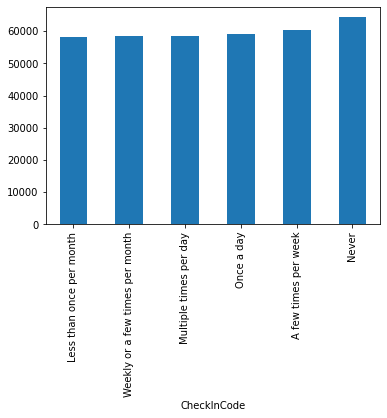

In [169]:
df1.groupby(['CheckInCode'])['Target A'].mean().sort_values().plot(kind='bar')

In [170]:
df1.groupby(['Target B'])['CheckInCode'].value_counts()

Target B  CheckInCode                    
0         Multiple times per day             1182
          A few times per week                316
          Once a day                          167
          Weekly or a few times per month     108
          Less than once per month             39
          Never                                17
1         Multiple times per day              303
          A few times per week                 90
          Once a day                           45
          Weekly or a few times per month      31
          Less than once per month             12
          Never                                 9
Name: CheckInCode, dtype: int64

In [171]:
df1['CheckInCode'].fillna('miss',inplace=True)

In [172]:
df1['CheckInCode'].unique()

array(['Multiple times per day', 'A few times per week', 'miss',
       'Weekly or a few times per month', 'Never',
       'Less than once per month', 'Once a day'], dtype=object)

In [173]:
df1['CheckInCode']=df1['CheckInCode'].map({'Multiple times per day':7, 'A few times per week':5, 'miss':0,
       'Weekly or a few times per month':3, 'Never':1,
       'Less than once per month':2, 'Once a day':4})

In [174]:
df1['AIResponsible'].value_counts()

The developers or the people creating the AI    992
A governmental or other regulatory body         597
Prominent industry leaders                      316
Nobody                                          165
Name: AIResponsible, dtype: int64

In [175]:
df1['AIResponsible'].isnull().sum()

876

In [176]:
res=df1['AIResponsible'].str.get_dummies(sep=';').rename(lambda x: 'res_' + x, axis='columns')
df1=df1.join(res)
df1.drop('AIResponsible',axis=1,inplace=True)

In [177]:
df1['AIFuture'].value_counts()

I'm excited about the possibilities more than worried about the dangers.        1601
I'm worried about the dangers more than I'm excited about the possibilities.     402
I don't care about it, or I haven't thought about it.                            193
Name: AIFuture, dtype: int64

In [178]:
fut=df1['AIFuture'].str.get_dummies(sep=';').rename(lambda x: 'res_' + x, axis='columns')
df1=df1.join(fut)
df1.drop('AIFuture',axis=1,inplace=True)

In [179]:
df1.drop(['AIDangerous','AIInteresting'],axis=1,inplace=True)

In [180]:
df1['Age'].value_counts()

25 - 34 years old     1117
18 - 24 years old      421
35 - 44 years old      364
45 - 54 years old       93
55 - 64 years old       23
Under 18 years old       9
Name: Age, dtype: int64

In [181]:
df1['Age'].isnull().sum()

919

In [182]:
df1['Age'].fillna('not',inplace=True)

In [183]:
df1['Age'].unique()

array(['25 - 34 years old', '35 - 44 years old', 'not',
       '18 - 24 years old', '45 - 54 years old', '55 - 64 years old',
       'Under 18 years old'], dtype=object)

In [184]:
df1['Age']=df1['Age'].map({'25 - 34 years old':3, '35 - 44 years old':4, 'not':0,
       '18 - 24 years old':2, '45 - 54 years old':5, '55 - 64 years old':6,
       'Under 18 years old':1})

In [185]:
df1['term'].value_counts()

 36 months    2059
 60 months     887
Name: term, dtype: int64

In [186]:
ter=pd.get_dummies(df1['term'],drop_first=True)
df1=df1.join(ter)
df1.drop('term',axis=1,inplace=True)

In [187]:
df1['emp_length'].value_counts()

10+ years    1017
< 1 year      277
2 years       265
3 years       261
5 years       183
1 year        180
4 years       170
8 years       148
6 years       118
9 years       100
7 years        94
Name: emp_length, dtype: int64

In [188]:
df1['emp_length'].isnull().sum()

133

In [189]:
df.groupby(['emp_length'])['Target B'].value_counts()

emp_length  Target B
1 year      0           138
            1            42
10+ years   0           771
            1           246
2 years     0           209
            1            56
3 years     0           210
            1            51
4 years     0           140
            1            30
5 years     0           147
            1            36
6 years     0            94
            1            24
7 years     0            81
            1            13
8 years     0           123
            1            25
9 years     0            76
            1            24
< 1 year    0           222
            1            55
Name: Target B, dtype: int64

In [190]:
df.groupby(['emp_length'])['loan_status'].value_counts()

emp_length  loan_status       
1 year      Fully Paid            135
            Charged Off            30
            Current                15
10+ years   Fully Paid            751
            Charged Off           143
            Current               119
            Late (31-120 days)      4
2 years     Fully Paid            182
            Charged Off            46
            Current                36
            In Grace Period         1
3 years     Fully Paid            191
            Charged Off            45
            Current                22
            Late (31-120 days)      3
4 years     Fully Paid            125
            Charged Off            28
            Current                14
            Late (31-120 days)      3
5 years     Fully Paid            123
            Charged Off            35
            Current                23
            In Grace Period         1
            Late (16-30 days)       1
6 years     Fully Paid             87
            Charged

<AxesSubplot:xlabel='emp_length'>

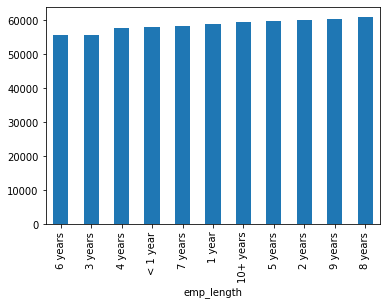

In [191]:
df1.groupby(['emp_length'])['Target A'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='emp_length'>

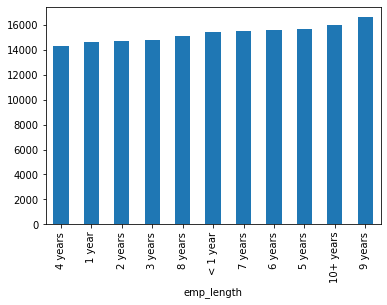

In [192]:
df1.groupby(['emp_length'])['LOAN_AMT'].mean().sort_values().plot(kind='bar')

In [193]:
lo=pd.get_dummies(df1['loan_status'],drop_first=True)
df1=df1.join(lo)
df1.drop('loan_status',axis=1,inplace=True)

In [194]:
df1['pymnt_plan'].value_counts()

n    2946
Name: pymnt_plan, dtype: int64

In [195]:
df1.drop('pymnt_plan',axis=1,inplace=True)

In [196]:
df1.drop('url',axis=1,inplace=True)

In [197]:
df1.head()

,id,Target A,Target B,LOAN_AMT,Job Description,Preferred Skills,Additional Information,FormalEducation,CompanySize,DevType,YearsCoding,LastNewJob,UpdateCV,TimeFullyProductive,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,CheckInCode,Age,emp_length,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,freq_bus,freq_civil,freq_div,freq_qual,resreq,40hrshift,35hrshift,timedif,"A health science (ex. nursing, pharmacy, radiology)","A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design,other,noprof,same,Retirement,Working as a founder or co-founder of my own company,Working as a product manager or project manager,Working as an engineering manager or other functional manager,Working in a career completely unrelated to software development,Working in a different or more specialized technical role than the one I'm in now,hother,I am not interested in new job opportunities,"Im not actively looking, but I am open to new opportunities",nan,confluence,Slack,"Other wiki tool (Github, Google Sites, proprietary software, etc.)","Other chat system (IRC, proprietary software, etc.)","Office / productivity suite (Microsoft Office, Google Suite, etc.)",Google Hangouts/Chat,Facebook,Trello,Jira,HipChat,Stack Overflow Enterprise,misspro,edutype,selftype,improve,enjoyable,build,win,agree,disagree,Neither Agree nor Disagree,Strongly agree,Strongly disagree,ide,os_BSD/Unix,os_Linux-based,os_MacOS,os_Windows,meth,ver_Copying and pasting files to network shares,ver_Git,ver_I don't use version control,ver_Mercurial,ver_Subversion,ver_Team Foundation Version Control,ver_Zip file back-ups,res_A governmental or other regulatory body,res_Nobody,res_Prominent industry leaders,res_The developers or the people creating the AI,"res_I don't care about it, or I haven't thought about it.",res_I'm excited about the possibilities more than worried about the dangers.,res_I'm worried about the dangers more than I'm excited about the possibilities.,60 months,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
0,68407277,42405.00,0,3600,Division of Economic & Financial Opportunity (...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",6,3,Full-stack developer,2,6,My job status or other personal status changed,2,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,7,3,10+ years,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar,1,3,1,1,1,0,0,3098.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,4.0,0,0,1,0,0,0,1,2,0,3.0,0,1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,68355089,60740.00,1,24700,The New York City Department of Small Business...,NaN,NaN,6,8,Database administrator;DevOps specialist;Full-...,11,3,I saw an employers advertisement,2,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,5,4,10+ years,small_business,Business,577xx,SD,16.06,Dec-99,16-Jun,926.35,NaN,19-Mar,1,48,1,40,1,0,0,2882.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,2,0,1,0,0,3.0,0,1,0,0,0.0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0

In [198]:
li=list(df1['purpose'].value_counts().head(4).index)

In [199]:
df1['purpose'].isnull().sum()

0

In [200]:
for col in li:
    df1[col+'_pur']=np.where(df1['purpose']==col,1,0)

In [201]:
df1.drop('purpose',axis=1,inplace=True)

In [202]:
df1['title'].value_counts()

Debt consolidation         1699
Credit card refinancing     699
Home improvement            156
Other                       141
Major purchase               55
Business                     33
Car financing                30
Medical expenses             21
Vacation                     17
Home buying                  17
Moving and relocation        13
Green loan                    1
Name: title, dtype: int64

In [203]:
df1.drop('title',axis=1,inplace=True)

In [204]:
df1['zip_code']=df1['zip_code'].str.rstrip('xx')

In [205]:
df1['zip_code']=df1['zip_code'].astype(int)

In [206]:
df1['zip_code']

0       190
1       577
2       605
3        76
4       174
       ... 
2941    234
2942    207
2943    907
2944    274
2945    606
Name: zip_code, Length: 2946, dtype: int32

In [207]:
df1['addr_state'].nunique()

49

In [208]:
df1['addr_state'].value_counts()

CA    357
TX    247
NY    238
FL    197
IL    106
OH    106
VA    103
GA    100
MD     99
NJ     96
PA     95
MA     87
MI     83
NC     82
CO     67
AZ     62
WA     60
MO     60
MN     57
TN     51
CT     50
AL     49
IN     47
SC     42
OR     39
NV     39
LA     36
WI     33
KY     28
AR     27
KS     26
MS     17
HI     17
OK     16
RI     14
ME     14
NH     13
DE     12
WV     12
NM     11
NE      9
UT      8
VT      8
MT      6
ND      5
SD      5
DC      4
WY      3
AK      3
Name: addr_state, dtype: int64

In [209]:
df1['freq_state']=df1['addr_state'].map(df1['addr_state'].value_counts())

In [210]:
df1.drop('addr_state',axis=1,inplace=True)

In [211]:
df1['freq_state'].isnull().sum()

0

In [212]:
df1['dti'].max()

51.2

In [213]:
df1['last_pymnt_d'].isnull().sum()

0

In [214]:
new=df1['last_pymnt_d'].str.split('-',expand=True)

In [215]:
new[1].unique()

array(['Jan', 'Jun', 'Feb', 'Jul', 'May', 'Nov', 'Aug', 'Apr', 'Mar',
       'Sep', 'Dec', 'Oct'], dtype=object)

In [216]:
df1['last_pay_mon']=new[1].map({'Jan':1, 'Jun':6, 'Feb':2, 'Jul':7, 'May':5, 'Nov':11, 'Aug':8, 'Apr':4, 'Mar':3,
       'Sep':9, 'Dec':12, 'Oct':10})

In [217]:
new[0].value_counts()

19    856
17    785
18    753
16    552
Name: 0, dtype: int64

In [218]:
df1['last_pay_date']=new[0]

In [219]:
df1.drop('last_pymnt_d',axis=1,inplace=True)

In [220]:
df1['next_pymnt_d'].unique()

array([nan, '19-Apr', '19-Mar'], dtype=object)

In [221]:
df1['next_pay_apr']=np.where(df1['next_pymnt_d']=='19-Apr',1,0)

In [222]:
df1.drop('next_pymnt_d',axis=1,inplace=True)

In [223]:
df1.head()

,id,Target A,Target B,LOAN_AMT,Job Description,Preferred Skills,Additional Information,FormalEducation,CompanySize,DevType,YearsCoding,LastNewJob,UpdateCV,TimeFullyProductive,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,CheckInCode,Age,emp_length,zip_code,dti,earliest_cr_line,last_pymnt_amnt,last_credit_pull_d,freq_bus,freq_civil,freq_div,freq_qual,resreq,40hrshift,35hrshift,timedif,"A health science (ex. nursing, pharmacy, radiology)","A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design,other,noprof,same,Retirement,Working as a founder or co-founder of my own company,Working as a product manager or project manager,Working as an engineering manager or other functional manager,Working in a career completely unrelated to software development,Working in a different or more specialized technical role than the one I'm in now,hother,I am not interested in new job opportunities,"Im not actively looking, but I am open to new opportunities",nan,confluence,Slack,"Other wiki tool (Github, Google Sites, proprietary software, etc.)","Other chat system (IRC, proprietary software, etc.)","Office / productivity suite (Microsoft Office, Google Suite, etc.)",Google Hangouts/Chat,Facebook,Trello,Jira,HipChat,Stack Overflow Enterprise,misspro,edutype,selftype,improve,enjoyable,build,win,agree,disagree,Neither Agree nor Disagree,Strongly agree,Strongly disagree,ide,os_BSD/Unix,os_Linux-based,os_MacOS,os_Windows,meth,ver_Copying and pasting files to network shares,ver_Git,ver_I don't use version control,ver_Mercurial,ver_Subversion,ver_Team Foundation Version Control,ver_Zip file back-ups,res_A governmental or other regulatory body,res_Nobody,res_Prominent industry leaders,res_The developers or the people creating the AI,"res_I don't care about it, or I haven't thought about it.",res_I'm excited about the possibilities more than worried about the dangers.,res_I'm worried about the dangers more than I'm excited about the possibilities.,60 months,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),debt_consolidation_pur,credit_card_pur,home_improvement_pur,other_pur,freq_state,last_pay_mon,last_pay_date,next_pay_apr
0,68407277,42405.00,0,3600,Division of Economic & Financial Opportunity (...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",6,3,Full-stack developer,2,6,My job status or other personal status changed,2,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,7,3,10+ years,190,5.91,3-Aug,122.67,19-Mar,1,3,1,1,1,0,0,3098.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,4.0,0,0,1,0,0,0,1,2,0,3.0,0,1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,95,1,19,0
1,68355089,60740.00,1,24700,The New York City Department of Small Business...,NaN,NaN,6,8,Database administrator;DevOps specialist;Full-...,11,3,I saw an employers advertisement,2,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,5,4,10+ years,577,16.06,Dec-99,926.35,19-Mar,1,48,1,40,1,0,0,2882.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,2,0,1,0,0,3.0,0,1,0,0,0.0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0

In [224]:
df1['last_credit_pull_d'].isnull().sum()

0

In [225]:
df1['last_credit_mon']=(df1['last_credit_pull_d'].str.split('-',expand=True))[1].map({'Jan':1, 'Jun':6, 'Feb':2, 'Jul':7, 'May':5, 'Nov':11, 'Aug':8, 'Apr':4, 'Mar':3,
       'Sep':9, 'Dec':12, 'Oct':10})

In [226]:
df1.drop('last_credit_pull_d',inplace=True,axis=1)

In [227]:
df1.drop('Job Description',axis=1,inplace=True)

In [228]:
df1.drop('Preferred Skills',axis=1,inplace=True)

In [229]:
(df1['DevType'].str.get_dummies(sep=';').rename(lambda x: 'dev_' + x, axis='columns')).sum().sort_values()

dev_Marketing or sales professional                    28
dev_C-suite executive (CEO, CTO, etc.)                 76
dev_Educator or academic researcher                    90
dev_Game or graphics developer                         96
dev_Product manager                                   119
dev_Embedded applications or devices developer        152
dev_Engineering manager                               167
dev_QA or test developer                              173
dev_Data scientist or machine learning specialist     219
dev_Student                                           223
dev_Data or business analyst                          225
dev_System administrator                              306
dev_DevOps specialist                                 314
dev_Designer                                          319
dev_Database administrator                            421
dev_Desktop or enterprise applications developer      476
dev_Mobile developer                                  523
dev_Front-end 

In [230]:
df1['UpdateCV'].value_counts()

My job status or other personal status changed                      825
A recruiter contacted me                                            300
I had a negative experience or interaction at work                  283
A friend told me about a job opportunity                            225
I saw an employers advertisement                                   191
I did not receive an expected change in compensation                149
I received bad news about the future of my company or department    109
I received negative feedback on my job performance                    7
Name: UpdateCV, dtype: int64

In [231]:
df1['UpdateCV'].fillna('not',inplace=True)

In [232]:
df1['badexp']=(df1['UpdateCV'].str.contains('negative|did not|bad')).map({True:1,False:0})

In [233]:
df1['jobsta']=(df1['UpdateCV'].str.contains('status')).map({True:1,False:0})
df1['recruiter']=(df1['UpdateCV'].str.contains('recruiter')).map({True:1,False:0})
df1['friend']=(df1['UpdateCV'].str.contains('friend')).map({True:1,False:0})
df1['add']=(df1['UpdateCV'].str.contains('advertisement')).map({True:1,False:0})

In [234]:
df1['friend'].value_counts()

0    2721
1     225
Name: friend, dtype: int64

In [235]:
df1.drop('UpdateCV',axis=1,inplace=True)

In [236]:
df1['langsame']=np.where(df1['LanguageWorkedWith']==df1['LanguageDesireNextYear'],1,0)

In [237]:
df1['databsame']=np.where(df1['DatabaseWorkedWith']==df1['DatabaseDesireNextYear'],1,0)
df1['framesame']=np.where(df1['FrameworkWorkedWith']==df1['FrameworkDesireNextYear'],1,0)

In [238]:
df1['databsame'].value_counts()

0    2522
1     424
Name: databsame, dtype: int64

In [239]:
(df1['DatabaseWorkedWith'].str.get_dummies(sep=';').rename(lambda x: 'dev_' + x, axis='columns')).sum().sort_values()

dev_Apache HBase                                      29
dev_Apache Hive                                       41
dev_IBM Db2                                           44
dev_Google BigQuery                                   47
dev_Amazon Redshift                                   55
dev_Neo4j                                             56
dev_Cassandra                                         77
dev_Google Cloud Storage                              95
dev_Amazon DynamoDB                                  111
dev_Memcached                                        111
dev_Amazon RDS/Aurora                                119
dev_Microsoft Azure (Tables, CosmosDB, SQL, etc)     168
dev_Oracle                                           250
dev_MariaDB                                          288
dev_Elasticsearch                                    333
dev_Redis                                            399
dev_SQLite                                           423
dev_MongoDB                    

In [240]:
lang=list((df1['LanguageWorkedWith'].str.get_dummies(sep=';').rename(lambda x: 'dev_' + x, axis='columns')).sum().sort_values(ascending=False).head(12).index)

In [241]:
df1['LanguageWorkedWith'].fillna('sefsCeF',inplace=True)

In [242]:
from sklearn.feature_extraction import FeatureHasher

In [243]:
fh = FeatureHasher(n_features=7, input_type='string')
hashed_features = fh.fit_transform(df1['LanguageWorkedWith'])
hashed_features = hashed_features.toarray()

In [244]:
hashed_features=pd.DataFrame(hashed_features)

In [245]:
hashed_features.columns = ['lang_0','lang_1','lang_2','lang_3','lang_4','lang_5','lang_6']

In [246]:
df1=df1.join(hashed_features)

In [247]:
df1['DatabaseWorkedWith'].dtypes

dtype('O')

In [248]:
df1['linux']=(df1['PlatformWorkedWith'].str.contains('Linux')).map({True:1,False:0})
df1['windows']=(df1['PlatformWorkedWith'].str.contains('Windows Desktop')).map({True:1,False:0})
df1['android']=(df1['PlatformWorkedWith'].str.contains('Android')).map({True:1,False:0})
df1['aws']=(df1['PlatformWorkedWith'].str.contains('AWS')).map({True:1,False:0})

In [249]:
df1['MySQL']=(df1['DatabaseWorkedWith'].str.contains('MySQL')).map({True:1,False:0})
df1['SQL Server']=(df1['DatabaseWorkedWith'].str.contains('SQL Server')).map({True:1,False:0})
df1['PostgreSQL']=(df1['DatabaseWorkedWith'].str.contains('PostgreSQL')).map({True:1,False:0})
df1['MongoDB']=(df1['DatabaseWorkedWith'].str.contains('MongoDB')).map({True:1,False:0})

In [250]:
fill=['aws','linux','windows','android','MySQL','SQL Server','PostgreSQL','MongoDB']

In [251]:
for col in fill:
    df1[col].fillna(0,inplace=True)

In [252]:
df1.head()

,id,Target A,Target B,LOAN_AMT,Additional Information,FormalEducation,CompanySize,DevType,YearsCoding,LastNewJob,TimeFullyProductive,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,CheckInCode,Age,emp_length,zip_code,dti,earliest_cr_line,last_pymnt_amnt,freq_bus,freq_civil,freq_div,freq_qual,resreq,40hrshift,35hrshift,timedif,"A health science (ex. nursing, pharmacy, radiology)","A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design,other,noprof,same,Retirement,Working as a founder or co-founder of my own company,Working as a product manager or project manager,Working as an engineering manager or other functional manager,Working in a career completely unrelated to software development,Working in a different or more specialized technical role than the one I'm in now,hother,I am not interested in new job opportunities,"Im not actively looking, but I am open to new opportunities",nan,confluence,Slack,"Other wiki tool (Github, Google Sites, proprietary software, etc.)","Other chat system (IRC, proprietary software, etc.)","Office / productivity suite (Microsoft Office, Google Suite, etc.)",Google Hangouts/Chat,Facebook,Trello,Jira,HipChat,Stack Overflow Enterprise,misspro,edutype,selftype,improve,enjoyable,build,win,agree,disagree,Neither Agree nor Disagree,Strongly agree,Strongly disagree,ide,os_BSD/Unix,os_Linux-based,os_MacOS,os_Windows,meth,ver_Copying and pasting files to network shares,ver_Git,ver_I don't use version control,ver_Mercurial,ver_Subversion,ver_Team Foundation Version Control,ver_Zip file back-ups,res_A governmental or other regulatory body,res_Nobody,res_Prominent industry leaders,res_The developers or the people creating the AI,"res_I don't care about it, or I haven't thought about it.",res_I'm excited about the possibilities more than worried about the dangers.,res_I'm worried about the dangers more than I'm excited about the possibilities.,60 months,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),debt_consolidation_pur,credit_card_pur,home_improvement_pur,other_pur,freq_state,last_pay_mon,last_pay_date,next_pay_apr,last_credit_mon,badexp,jobsta,recruiter,friend,add,langsame,databsame,framesame,lang_0,lang_1,lang_2,lang_3,lang_4,lang_5,lang_6,linux,windows,android,aws,MySQL,SQL Server,PostgreSQL,MongoDB
0,68407277,42405.00,0,3600,"Salary range for this position is: $42,405 - $...",6,3,Full-stack developer,2,6,2,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,7,3,10+ years,190,5.91,3-Aug,122.67,1,3,1,1,1,0,0,3098.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,4.0,0,0,1,0,0,0,1,2,0,3.0,0,1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,95,1,19,0,3,0,1,0,0,0,1,1,1,-2.0,-2.0,0.0,-2.0,3.0,-6.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,68355089,60740.00,1,24700,NaN,6,8,Database administrator;DevOps specialist;Full-...,11,3,2,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,5,4,10+ years,577,16.06,Dec-99,926.35,1,48,1,40,1,0,0,2882.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,2,0,1,0,0,3.0,0,1,0,0,0.0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,5,6,16,0,3,0,0,0,0,1,0,0,0,0.0,

In [253]:
df1.drop(['LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','FrameworkWorkedWith','FrameworkDesireNextYear'],axis=1,inplace=True)

In [254]:
df1['emp_length'].value_counts()

10+ years    1017
< 1 year      277
2 years       265
3 years       261
5 years       183
1 year        180
4 years       170
8 years       148
6 years       118
9 years       100
7 years        94
Name: emp_length, dtype: int64

In [255]:
df1['emp_length'].isnull().sum()

133

In [256]:
df1['emp_length'].fillna('10+ years',inplace=True)

In [257]:
emp=pd.get_dummies(df1['emp_length'],drop_first=True)

In [258]:
df1=df1.join(emp)

In [259]:
df1.drop('emp_length',axis=1,inplace=True)

In [260]:
df1['last_pymnt_amnt'].isnull().sum()

0

In [261]:
cr=df1['earliest_cr_line'].str.split('-',expand=True)

In [262]:
cr.dtypes

0    object
1    object
dtype: object

In [263]:
import re

In [264]:
df1['earliest_cr_line'] = df1['earliest_cr_line'].str.replace('\d+', '')

In [265]:
df1['earliest_cr_line'] = df1['earliest_cr_line'].str.replace('-', '')

In [266]:
df1['earliest_cr_line']=df1['earliest_cr_line'].map({'Jan':1, 'Jun':6, 'Feb':2, 'Jul':7, 'May':5, 'Nov':11, 'Aug':8, 'Apr':4, 'Mar':3,
       'Sep':9, 'Dec':12, 'Oct':10})

In [267]:
df1['earliest_cr_line'].dtype

dtype('int64')

In [268]:
df1.drop('Additional Information',axis=1,inplace=True)

In [269]:
df1.head()

,id,Target A,Target B,LOAN_AMT,FormalEducation,CompanySize,DevType,YearsCoding,LastNewJob,TimeFullyProductive,CheckInCode,Age,zip_code,dti,earliest_cr_line,last_pymnt_amnt,freq_bus,freq_civil,freq_div,freq_qual,resreq,40hrshift,35hrshift,timedif,"A health science (ex. nursing, pharmacy, radiology)","A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design,other,noprof,same,Retirement,Working as a founder or co-founder of my own company,Working as a product manager or project manager,Working as an engineering manager or other functional manager,Working in a career completely unrelated to software development,Working in a different or more specialized technical role than the one I'm in now,hother,I am not interested in new job opportunities,"Im not actively looking, but I am open to new opportunities",nan,confluence,Slack,"Other wiki tool (Github, Google Sites, proprietary software, etc.)","Other chat system (IRC, proprietary software, etc.)","Office / productivity suite (Microsoft Office, Google Suite, etc.)",Google Hangouts/Chat,Facebook,Trello,Jira,HipChat,Stack Overflow Enterprise,misspro,edutype,selftype,improve,enjoyable,build,win,agree,disagree,Neither Agree nor Disagree,Strongly agree,Strongly disagree,ide,os_BSD/Unix,os_Linux-based,os_MacOS,os_Windows,meth,ver_Copying and pasting files to network shares,ver_Git,ver_I don't use version control,ver_Mercurial,ver_Subversion,ver_Team Foundation Version Control,ver_Zip file back-ups,res_A governmental or other regulatory body,res_Nobody,res_Prominent industry leaders,res_The developers or the people creating the AI,"res_I don't care about it, or I haven't thought about it.",res_I'm excited about the possibilities more than worried about the dangers.,res_I'm worried about the dangers more than I'm excited about the possibilities.,60 months,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),debt_consolidation_pur,credit_card_pur,home_improvement_pur,other_pur,freq_state,last_pay_mon,last_pay_date,next_pay_apr,last_credit_mon,badexp,jobsta,recruiter,friend,add,langsame,databsame,framesame,lang_0,lang_1,lang_2,lang_3,lang_4,lang_5,lang_6,linux,windows,android,aws,MySQL,SQL Server,PostgreSQL,MongoDB,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,68407277,42405.00,0,3600,6,3,Full-stack developer,2,6,2,7,3,190,5.91,8,122.67,1,3,1,1,1,0,0,3098.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,4.0,0,0,1,0,0,0,1,2,0,3.0,0,1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,95,1,19,0,3,0,1,0,0,0,1,1,1,-2.0,-2.0,0.0,-2.0,3.0,-6.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0
1,68355089,60740.00,1,24700,6,8,Database administrator;DevOps specialist;Full-...,11,3,2,5,4,577,16.06,12,926.35,1,48,1,40,1,0,0,2882.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,2,0,1,0,0,3.0,0,1,0,0,0.0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,5,6,16,0,3,0,0,0,0,1,0,0,0,0.0,-2.0,-2.0,-1.0,6.0,-6.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0
2,68341763,51907.68,0,20000,5,3,Engineering manager;Full-stack developer,9,6,0,0,0,605,10.78,8,15813.30,2,6,2,6,0,0,0,2196.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,106,6,17,0,3,0,0,0,0,0,0,0,0,-1.0,-3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
3,66310712,51907.68,0,35000,6,4,Full-s

In [270]:
(df1['DevType'].str.get_dummies(sep=';').rename(lambda x: 'dev_' + x, axis='columns')).sum().sort_values()

dev_Marketing or sales professional                    28
dev_C-suite executive (CEO, CTO, etc.)                 76
dev_Educator or academic researcher                    90
dev_Game or graphics developer                         96
dev_Product manager                                   119
dev_Embedded applications or devices developer        152
dev_Engineering manager                               167
dev_QA or test developer                              173
dev_Data scientist or machine learning specialist     219
dev_Student                                           223
dev_Data or business analyst                          225
dev_System administrator                              306
dev_DevOps specialist                                 314
dev_Designer                                          319
dev_Database administrator                            421
dev_Desktop or enterprise applications developer      476
dev_Mobile developer                                  523
dev_Front-end 

In [271]:
dev=df1['DevType'].str.get_dummies(sep=';').rename(lambda x: 'devtype_' + x, axis='columns')

In [272]:
df1=df1.join(dev)

In [273]:
df1.drop('DevType',axis=1,inplace=True)

In [274]:
df1.head()

,id,Target A,Target B,LOAN_AMT,FormalEducation,CompanySize,YearsCoding,LastNewJob,TimeFullyProductive,CheckInCode,Age,zip_code,dti,earliest_cr_line,last_pymnt_amnt,freq_bus,freq_civil,freq_div,freq_qual,resreq,40hrshift,35hrshift,timedif,"A health science (ex. nursing, pharmacy, radiology)","A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design,other,noprof,same,Retirement,Working as a founder or co-founder of my own company,Working as a product manager or project manager,Working as an engineering manager or other functional manager,Working in a career completely unrelated to software development,Working in a different or more specialized technical role than the one I'm in now,hother,I am not interested in new job opportunities,"Im not actively looking, but I am open to new opportunities",nan,confluence,Slack,"Other wiki tool (Github, Google Sites, proprietary software, etc.)","Other chat system (IRC, proprietary software, etc.)","Office / productivity suite (Microsoft Office, Google Suite, etc.)",Google Hangouts/Chat,Facebook,Trello,Jira,HipChat,Stack Overflow Enterprise,misspro,edutype,selftype,improve,enjoyable,build,win,agree,disagree,Neither Agree nor Disagree,Strongly agree,Strongly disagree,ide,os_BSD/Unix,os_Linux-based,os_MacOS,os_Windows,meth,ver_Copying and pasting files to network shares,ver_Git,ver_I don't use version control,ver_Mercurial,ver_Subversion,ver_Team Foundation Version Control,ver_Zip file back-ups,res_A governmental or other regulatory body,res_Nobody,res_Prominent industry leaders,res_The developers or the people creating the AI,"res_I don't care about it, or I haven't thought about it.",res_I'm excited about the possibilities more than worried about the dangers.,res_I'm worried about the dangers more than I'm excited about the possibilities.,60 months,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),debt_consolidation_pur,credit_card_pur,home_improvement_pur,other_pur,freq_state,last_pay_mon,last_pay_date,next_pay_apr,last_credit_mon,badexp,jobsta,recruiter,friend,add,langsame,databsame,framesame,lang_0,lang_1,lang_2,lang_3,lang_4,lang_5,lang_6,linux,windows,android,aws,MySQL,SQL Server,PostgreSQL,MongoDB,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,devtype_Back-end developer,"devtype_C-suite executive (CEO, CTO, etc.)",devtype_Data or business analyst,devtype_Data scientist or machine learning specialist,devtype_Database administrator,devtype_Designer,devtype_Desktop or enterprise applications developer,devtype_DevOps specialist,devtype_Educator or academic researcher,devtype_Embedded applications or devices developer,devtype_Engineering manager,devtype_Front-end developer,devtype_Full-stack developer,devtype_Game or graphics developer,devtype_Marketing or sales professional,devtype_Mobile developer,devtype_Product manager,devtype_QA or test developer,devtype_Student,devtype_System administrator
0,68407277,42405.00,0,3600,6,3,2,6,2,7,3,190,5.91,8,122.67,1,3,1,1,1,0,0,3098.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,4.0,0,0,1,0,0,0,1,2,0,3.0,0,1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,95,1,19,0,3,0,1,0,0,0,1,1,1,-2.0,-2.0,0.0,-2.0,3.0,-6.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,68355089,60740.00,1,24700,6,8,11,3,2,5,4,577,16.06,12,926.35,1,48,1,40,1,0,0,2882.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,2

In [275]:
df1['timedif']=pd.to_numeric(df1['timedif'])
df1['last_pay_date']=pd.to_numeric(df1['last_pay_date'])

In [276]:
obj=[col for col in df1.columns if df1[col].dtypes=='object']

In [277]:
obj

[]

In [278]:
df1['timedif'].fillna(19,inplace=True)

In [279]:
df1['id']

0       68407277
1       68355089
2       68341763
3       66310712
4       68476807
          ...   
2941    68394526
2942    68404684
2943    68414567
2944    68373599
2945    68172458
Name: id, Length: 2946, dtype: int64

In [280]:
df1['id1']=df1['id']//(10**5)

In [281]:
df1['id1']

0       684
1       683
2       683
3       663
4       684
       ... 
2941    683
2942    684
2943    684
2944    683
2945    681
Name: id1, Length: 2946, dtype: int64

In [282]:
df1.drop('id',axis=1,inplace=True)

In [283]:
df1.head()

,Target A,Target B,LOAN_AMT,FormalEducation,CompanySize,YearsCoding,LastNewJob,TimeFullyProductive,CheckInCode,Age,zip_code,dti,earliest_cr_line,last_pymnt_amnt,freq_bus,freq_civil,freq_div,freq_qual,resreq,40hrshift,35hrshift,timedif,"A health science (ex. nursing, pharmacy, radiology)","A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design,other,noprof,same,Retirement,Working as a founder or co-founder of my own company,Working as a product manager or project manager,Working as an engineering manager or other functional manager,Working in a career completely unrelated to software development,Working in a different or more specialized technical role than the one I'm in now,hother,I am not interested in new job opportunities,"Im not actively looking, but I am open to new opportunities",nan,confluence,Slack,"Other wiki tool (Github, Google Sites, proprietary software, etc.)","Other chat system (IRC, proprietary software, etc.)","Office / productivity suite (Microsoft Office, Google Suite, etc.)",Google Hangouts/Chat,Facebook,Trello,Jira,HipChat,Stack Overflow Enterprise,misspro,edutype,selftype,improve,enjoyable,build,win,agree,disagree,Neither Agree nor Disagree,Strongly agree,Strongly disagree,ide,os_BSD/Unix,os_Linux-based,os_MacOS,os_Windows,meth,ver_Copying and pasting files to network shares,ver_Git,ver_I don't use version control,ver_Mercurial,ver_Subversion,ver_Team Foundation Version Control,ver_Zip file back-ups,res_A governmental or other regulatory body,res_Nobody,res_Prominent industry leaders,res_The developers or the people creating the AI,"res_I don't care about it, or I haven't thought about it.",res_I'm excited about the possibilities more than worried about the dangers.,res_I'm worried about the dangers more than I'm excited about the possibilities.,60 months,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),debt_consolidation_pur,credit_card_pur,home_improvement_pur,other_pur,freq_state,last_pay_mon,last_pay_date,next_pay_apr,last_credit_mon,badexp,jobsta,recruiter,friend,add,langsame,databsame,framesame,lang_0,lang_1,lang_2,lang_3,lang_4,lang_5,lang_6,linux,windows,android,aws,MySQL,SQL Server,PostgreSQL,MongoDB,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,devtype_Back-end developer,"devtype_C-suite executive (CEO, CTO, etc.)",devtype_Data or business analyst,devtype_Data scientist or machine learning specialist,devtype_Database administrator,devtype_Designer,devtype_Desktop or enterprise applications developer,devtype_DevOps specialist,devtype_Educator or academic researcher,devtype_Embedded applications or devices developer,devtype_Engineering manager,devtype_Front-end developer,devtype_Full-stack developer,devtype_Game or graphics developer,devtype_Marketing or sales professional,devtype_Mobile developer,devtype_Product manager,devtype_QA or test developer,devtype_Student,devtype_System administrator,id1
0,42405.00,0,3600,6,3,2,6,2,7,3,190,5.91,8,122.67,1,3,1,1,1,0,0,3098.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,4.0,0,0,1,0,0,0,1,2,0,3.0,0,1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,95,1,19,0,3,0,1,0,0,0,1,1,1,-2.0,-2.0,0.0,-2.0,3.0,-6.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,684
1,60740.00,1,24700,6,8,11,3,2,5,4,577,16.06,12,926.35,1,48,1,40,1,0,0,2882.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,2,0,1,0,0,3.0,

In [284]:
nul=[col for col in df1.columns if df1[col].isnull().sum()!=0]

In [285]:
nul

[]

In [286]:
from sklearn.preprocessing import StandardScaler

In [287]:
import re

In [288]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df1.columns.values]

In [289]:
Y_a=df1['Target A']
Y_b=df1['Target B']
X_a=df1.drop(['Target A','Target B'],axis=1)
X_b=df1.drop(['Target A','Target B'],axis=1)

In [290]:
scaler=StandardScaler()
X_a=scaler.fit_transform(X_a)
scaler1=StandardScaler()
X_b=scaler1.fit_transform(X_b)

# Splitting dataset

In [291]:
from sklearn.model_selection import train_test_split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=0)

In [292]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_b, test_size=0.2, random_state=0)

In [293]:
Y_b.dtype

dtype('int64')

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [295]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score

In [296]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train_b,y_train_b) 
y_predd_b=dt.predict(X_test_b)
print(confusion_matrix(y_test_b,y_predd_b))
print(accuracy_score(y_test_b,y_predd_b))
print(classification_report(y_test_b,y_predd_b))

[[363  92]
 [104  31]]
0.6677966101694915
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       455
           1       0.25      0.23      0.24       135

    accuracy                           0.67       590
   macro avg       0.51      0.51      0.51       590
weighted avg       0.66      0.67      0.66       590



In [297]:
f1_score(y_test_b, y_predd_b, average='weighted')

0.6622327941263231

In [298]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train_b,y_train_b)
y_predr_b=rf.predict(X_test_b)
print(confusion_matrix(y_test_b,y_predr_b)) 
print(accuracy_score(y_test_b,y_predr_b)) 
print(classification_report(y_test_b,y_predr_b))

[[455   0]
 [135   0]]
0.7711864406779662
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       455
           1       0.00      0.00      0.00       135

    accuracy                           0.77       590
   macro avg       0.39      0.50      0.44       590
weighted avg       0.59      0.77      0.67       590



F:\anCONDA\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [299]:
f1_score(y_test_b, y_predr_b, average='weighted')

0.6715594842267456

In [300]:
classifier = XGBClassifier(random_state=0) 
classifier.fit(X_train_b,y_train_b)
y_predx_b = classifier.predict(X_test_b)
print(confusion_matrix(y_test_b,y_predx_b)) 
print(accuracy_score(y_test_b,y_predx_b)) 
print(classification_report(y_test_b,y_predx_b))

[[453   2]
 [134   1]]
0.7694915254237288
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       455
           1       0.33      0.01      0.01       135

    accuracy                           0.77       590
   macro avg       0.55      0.50      0.44       590
weighted avg       0.67      0.77      0.67       590



In [301]:
f1_score(y_test_b, y_predx_b, average='weighted')

0.6738486867695337

In [302]:
clasn=GaussianNB() 
clasn.fit(X_train_b, y_train_b)
y_predn_b=clasn.predict(X_test_b)
print(confusion_matrix(y_test_b,y_predn_b)) 
print(accuracy_score(y_test_b,y_predn_b))
print(classification_report(y_test_b,y_predn_b))

[[309 146]
 [ 94  41]]
0.5932203389830508
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       455
           1       0.22      0.30      0.25       135

    accuracy                           0.59       590
   macro avg       0.49      0.49      0.49       590
weighted avg       0.64      0.59      0.61       590



In [303]:
f1_score(y_test_b, y_predn_b, average='weighted')

0.6137392452794074

In [304]:
lr=LogisticRegression(random_state=0) 
lr.fit(X_train_b,y_train_b)
y_pred_b=lr.predict(X_test_b)
print(confusion_matrix(y_test_b,y_pred_b))
print(accuracy_score(y_test_b,y_pred_b)) 
print(classification_report(y_test_b,y_pred_b))

[[449   6]
 [128   7]]
0.7728813559322034
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       455
           1       0.54      0.05      0.09       135

    accuracy                           0.77       590
   macro avg       0.66      0.52      0.48       590
weighted avg       0.72      0.77      0.69       590



In [305]:
f1_score(y_test_b, y_pred_b, average='weighted')

0.692696293060897

In [306]:
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train_a,y_train_a)
y_pred_dt = decision_regressor.predict(X_test_a)

In [307]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test_a, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test_a, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test_a, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 16404.502718644064
Mean Squared Error (MSE): 789442274.8683125
Root Mean Squared Error (RMSE): 28097.01540855029


In [308]:
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train_a,y_train_a)
y_pred_rf = random_regressor.predict(X_test_a)

In [309]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test_a, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test_a, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test_a, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13026.428817471186
Mean Squared Error (MSE): 506208034.5003846
Root Mean Squared Error (RMSE): 22499.067414014844
